<a href="https://colab.research.google.com/github/raviteja-padala/NLP/blob/main/Extracting_medicines_from_Transcriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying and Extracting Medicines from Medical Transcriptions



**Objective:**

- The objective of this project is to accurately identifying and extracting medicine names from medical transcriptions. By implementing natural language processing (NLP) techniques, the project aims to enhance the efficiency of medicine recognition, contributing to improved medical data analysis and information retrieval.

**Use Cases:**
1. **Medical Documentation Enhancement:** The accurate identification of medicines from medical transcriptions can enhance the quality and organization of medical documentation. This is essential for maintaining accurate patient records and facilitating efficient healthcare communication.

2. **Pharmacovigilance:** The project can contribute to pharmacovigilance efforts by automating the extraction of medicine names from patient reports. This can aid in monitoring adverse drug reactions and ensuring patient safety.

3. **Clinical Research:** Identifying medicines from medical transcriptions is crucial for clinical research. The project can assist researchers in efficiently identifying and categorizing medicines mentioned in research documents, leading to more accurate analyses.

4. **Drug Interaction Analysis:** Automated medicine extraction can aid in analyzing potential drug interactions. By identifying and cataloging medicines mentioned in patient histories, healthcare providers can better assess possible interactions and make informed treatment decisions.

# Plan of Action:

1. **Data Preprocessing:** Clean and preprocess the medical transcriptions to remove noise, irrelevant information, and formatting issues.

2. **Tokenization:** Tokenize the preprocessed text into individual words, enhancing the granularity of analysis.

3. **Named Entity Recognition (NER):** Implement NLP techniques to perform Named Entity Recognition to identify and tag entities in the text. Focus on the 'ORGANIZATION' tag for medicine identification.

4. **Less Common Words:** Identify less common words with word counts below 50 to narrow down the potential medicine candidates.

5. **Capitalized Words:** Identify capitalized words within the less common candidates, as medicine names often follow capitalization conventions.

6. **Refinement with Brute Force:** Implement a brute force approach to identify medicine names more accurately, considering medical dictionaries, synonyms, and context.

7. **Validation and Testing:** Validate the extracted medicine names against existing medical databases and manually curated lists to assess accuracy.

8. **Using ScispaCy module:**  utilizing SciSpacy to perform custom Named Entity Recognition on clinical texts. ScispaCy a pre-trained NER model en_ner_bc5cdr_md-0.5.1 used to extract disease and drugs.


In [1]:
#importing pandas library
import pandas as pd

#importing dataset
clinical_df  = pd.read_csv("https://raw.githubusercontent.com/chandlergibbons/Machine-Learning-Medical-Transcription-Project/main/mtsamples%204.csv")

In [2]:
#loading only required columns
df0 = clinical_df[["description", "medical_specialty", "transcription"]]

In [3]:
df0.head()

,description,medical_specialty,transcription
0,A 23-year-old white female presents with comp...,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [4]:
# Strip leading and trailing whitespaces from the 'medical_specialty' column
df0['medical_specialty'] = df0['medical_specialty'].str.strip()

# Print the unique values in the 'medical_specialty' column after stripping
print(df0['medical_specialty'].unique())

['Allergy / Immunology' 'Bariatrics' 'Cardiovascular / Pulmonary'
 'Neurology' 'Dentistry' 'Urology' 'General Medicine' 'Surgery'
 'Speech - Language' 'SOAP / Chart / Progress Notes' 'Sleep Medicine'
 'Rheumatology' 'Radiology' 'Psychiatry / Psychology' 'Podiatry'
 'Physical Medicine - Rehab' 'Pediatrics - Neonatal' 'Pain Management'
 'Orthopedic' 'Ophthalmology' 'Office Notes' 'Obstetrics / Gynecology'
 'Neurosurgery' 'Nephrology' 'Letters' 'Lab Medicine - Pathology'
 'IME-QME-Work Comp etc.' 'Hospice - Palliative Care'
 'Hematology - Oncology' 'Gastroenterology' 'ENT - Otolaryngology'
 'Endocrinology' 'Emergency Room Reports' 'Discharge Summary'
 'Diets and Nutritions' 'Dermatology' 'Cosmetic / Plastic Surgery'
 'Consult - History and Phy.' 'Chiropractic' 'Autopsy']


<ipython-input-4-0b8dfa9e6a2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['medical_specialty'] = df0['medical_specialty'].str.strip()


In [5]:
#reading the 0th transcription
df0['transcription'][0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

### Stopwords removal

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

# Check for missing values in the 'transcription' column
missing_indices = df0[df0['transcription'].isnull()].index

# Remove stopwords only for non-missing values
df0['transcription'] = df0['transcription'].apply(lambda x: [item for item in x.split() if item not in sw_list] if pd.notnull(x) else []).apply(lambda x: " ".join(x))

# Print the first few rows to verify
df0.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-6-339181a21ef8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['transcription'] = df0['transcription'].apply(lambda x: [item for item in x.split() if item not in sw_list] if pd.notnull(x) else []).apply(lambda x: " ".join(x))


,description,medical_specialty,transcription
0,A 23-year-old white female presents with comp...,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pre..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,"PAST MEDICAL HISTORY:, He difficulty climbing ..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I seen ABC today..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement left..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,1. The left ventricular cavity size wall thick...


In [7]:
#checking transcription after stopwords removal
df0['transcription'][0]

'SUBJECTIVE:, This 23-year-old white female presents complaint allergies. She used allergies lived Seattle thinks worse here. In past, tried Claritin, Zyrtec. Both worked short time seemed lose effectiveness. She used Allegra also. She used last summer began using two weeks ago. It appear working well. She used over-the-counter sprays prescription nasal sprays. She asthma doest require daily medication think flaring up.,MEDICATIONS: , Her medication currently Ortho Tri-Cyclen Allegra.,ALLERGIES: , She known medicine allergies.,OBJECTIVE:,Vitals: Weight 130 pounds blood pressure 124/78.,HEENT: Her throat mildly erythematous without exudate. Nasal mucosa erythematous swollen. Only clear drainage seen. TMs clear.,Neck: Supple without adenopathy.,Lungs: Clear.,ASSESSMENT:, Allergic rhinitis.,PLAN:,1. She try Zyrtec instead Allegra again. Another option use loratadine. She think prescription coverage might cheaper.,2. Samples Nasonex two sprays nostril given three weeks. A prescription writ

## Selecting only Orthopedic section

In [8]:
# List of desired medical specialties
desired_speciality = ['Orthopedic']

# Filter the DataFrame to include only rows with desired medical specialties
ortho_df = df0[df0['medical_specialty'].isin(desired_speciality)]

# Print the information of the filtered DataFrame
print(ortho_df.info())

# Print the unique values in the 'medical_specialty' column of the filtered DataFrame
ortho_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 2008 to 2367
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        355 non-null    object
 1   medical_specialty  355 non-null    object
 2   transcription      355 non-null    object
dtypes: object(3)
memory usage: 11.1+ KB
None


,description,medical_specialty,transcription
2008,Youngswick osteotomy with internal screw fixa...,Orthopedic,"TITLE OF OPERATION: , Youngswick osteotomy int..."
2011,Austin & Youngswick bunionectomy with Biopro ...,Orthopedic,"PREOPERATIVE DIAGNOSES:,1. Hallux rigidus, lef..."
2012,Consultation for wrist pain.,Orthopedic,"CHIEF COMPLAINT:, Left wrist pain.,HISTORY OF ..."
2013,Excision of dorsal wrist ganglion. Made a tr...,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Wrist ganglion.,POST..."
2014,Unilateral transpedicular T11 vertebroplasty.,Orthopedic,"PREOPERATIVE DIAGNOSIS:, T11 compression fract..."


# Creating corpus of Orthopedic transcriptions

In [9]:

# Merge all text from 'transcription' column into a single string
ortho_corpus = " ".join(ortho_df['transcription'])

# Print the first 500 characters of the corpus as a check
print(ortho_corpus[:150])

TITLE OF OPERATION: , Youngswick osteotomy internal screw fixation first right metatarsophalangeal joint right foot.,PREOPERATIVE DIAGNOSIS: , Hallux 


In [10]:
len(ortho_corpus)

1002850

In [11]:
from collections import Counter
import nltk
nltk.download('punkt')


# Tokenize the corpus
tokens = nltk.word_tokenize(ortho_corpus)
print("tokens count=", len(tokens))


# Remove stopwords
sw_list = stopwords.words('english')
filtered_tokens = [word for word in tokens if word.lower() not in sw_list]

# Count word frequencies
word_counts = Counter(filtered_tokens)
print(len(word_counts))

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of words

# Print the most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


tokens count= 159115
12595
,: 12981
.: 11714
:: 2956
patient: 1841
right: 997
placed: 915
left: 831
pain: 676
well: 625
#: 576


In [12]:
# Get the least common words and their frequencies
least_common_words = word_counts.most_common()[-10:]  # Change 10 to the desired number of words

# Print the least common words and their frequencies
for word, count in least_common_words:
    print(f"{word}: {count}")

Pleasant: 1
Squeezing: 1
rerupture: 1
¼: 1
travel: 1
tide: 1
crouched: 1
recheck: 1
AFOs: 1
lengthenings: 1


## Extracting Medicine words using NER

In [13]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords

# Download necessary NLTK resources if not already downloaded
nltk.download('punkt')                  # Download tokenization models (used for word/token splitting)
nltk.download('maxent_ne_chunker')      # Download the named entity chunker model
nltk.download('words')                  # Download the list of English words
nltk.download('averaged_perceptron_tagger')  # Download the part-of-speech tagging model


# Merge all text from 'transcription' column into a single string
ortho_corpus = " ".join(ortho_df['transcription'])

# Tokenize the corpus
tokens = nltk.word_tokenize(ortho_corpus)
print("Tokens count:", len(tokens))

# Remove stopwords
sw_list = stopwords.words('english')
filtered_tokens = [word for word in tokens if word.lower() not in sw_list]

# Part-of-speech tagging
tagged_tokens = pos_tag(filtered_tokens)


# Named Entity Recognition (NER) using NLTK's ne_chunk function
ner_tags = ne_chunk(tagged_tokens)

# Initialize an empty list to store extracted medication names
medications = []

# Iterate through the NER results (parsed tree structure)
for subtree in ner_tags:
    # Check if the current subtree is a named entity recognized as an organization
    if isinstance(subtree, nltk.Tree) and subtree.label() == 'ORGANIZATION':
        # Extract and join the words within the recognized named entity to form a medication name
        medication_name = ' '.join([word for word, _ in subtree.leaves()])

        # Add the extracted medication name to the medications list
        medications.append(medication_name)

# Print extracted medication names
print("Extracted medications:", medications)
print("count of medical NER ", len(medications))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Tokens count: 159115
Extracted medications: ['OPERATION', 'POSTOPERATIVE', 'ESTIMATED', 'Less', 'HEMOSTASIS', 'MATERIALS', 'OsteoMed System', 'INJECTABLES', 'DESCRIPTION', 'OsteoMed System', 'OsteoMed System', 'AO', 'Hospital', 'POSTOPERATIVE', 'PROCEDURE', 'ABCD', 'Hospital', 'MPJ', 'PROCEDURE', 'IV', 'Department Anesthesia', 'Department Anesthesia', 'PACU', 'COMPLAINT', 'HISTORY', 'POSTOPERATIVE', 'TITLE', 'Excision', 'POSTOPERATIVE', 'OPERATION', 'Unilateral', 'COMPLICATIONS', 'AP', 'AP', '__________', 'DIAGNOSIS', 'POSTOPERATIVE', 'OPERATIONS', 'COMPLICATIONS', 'POSTOPERATIVE', 'PROCEDURES', 'BLOOD', 'COMPLICATIONS', 'FINDINGS', 'SCU', 'PROCEDURE', 'MAC', 'Meticulous', 'PROCEDURE', 'MAC', 'Meticulous', 'POSTOPERATIVE', 'PROCEDURE', 'FINDINGS', 'FCU', 'FCU', 'FCU', 'FCU', 'Total', 'PROCEDURE', 'ACL', 'POSTOPERATIVE', 'DESCRIPTION', 'ACL', 'POSTOPERATIVE', 'PROCEDURE', 'TOURNIQUET', 'BLOOD', 'IMPLANT', 'NexGen', 'GROSS', 'ABCD', 'Distal', 'ABDs', 'PROCEDURE', 'MAC', 'MPJ', 'Meticulou

In [14]:
from collections import Counter

# Create a Counter object from the medications list
medication_counter = Counter(medications)
print(len(medication_counter))

# Get the most common medications and their frequencies
most_common_medications = medication_counter.most_common(50)  # Change 10 to the desired number of medications

# Print the most common medications and their frequencies
for medication, count in most_common_medications:
    print(f"{medication}: {count}")

651
POSTOPERATIVE: 202
PROCEDURE: 134
COMPLICATIONS: 104
MRI: 98
ESTIMATED: 75
AP: 65
FINDINGS: 62
IMPRESSION: 58
HISTORY: 57
PAST: 56
Department Anesthesia: 50
DESCRIPTION: 48
OPERATIVE: 48
MEDICAL: 42
General: 41
ABCD: 38
PHYSICAL: 38
PROCEDURES: 36
TOURNIQUET: 36
CSF: 36
SOCIAL: 31
DRAINS: 30
PACU: 29
REVIEW: 29
IV: 27
CLINICAL: 27
MEDICATIONS: 27
Hospital: 26
DISPOSITION: 26
PLAN: 25
ASSESSMENT: 25
SPECIMENS: 24
BLE: 23
Less: 21
ABDs: 21
CPT: 21
COMPLAINT: 20
BLOOD: 19
________: 19
REASON: 19
FAMILY: 19
ABC: 18
INDICATIONS: 18
FCR: 18
OPERATION: 17
ACL: 17
BMP: 17
INDICATION: 17
DISCHARGE: 16
HEENT: 16


In [15]:
#finding words that occur less commomn 50 words
from collections import Counter

# Create a Counter object from the medications list
medication_counter = Counter(medications)

# Get medications whose count is less than 50
less_common_medications = {medication: count for medication, count in medication_counter.items() if count < 50}
print(len(less_common_medications))

# Print the medications with counts less than 50
for medication, count in less_common_medications.items():
    print(f"{medication}: {count}")

640
OPERATION: 17
Less: 21
HEMOSTASIS: 7
MATERIALS: 5
OsteoMed System: 4
INJECTABLES: 4
DESCRIPTION: 48
AO: 6
Hospital: 26
ABCD: 38
MPJ: 3
IV: 27
PACU: 29
COMPLAINT: 20
TITLE: 10
Excision: 3
Unilateral: 1
__________: 9
DIAGNOSIS: 15
OPERATIONS: 14
PROCEDURES: 36
BLOOD: 19
SCU: 1
MAC: 11
Meticulous: 8
FCU: 5
Total: 5
ACL: 17
TOURNIQUET: 36
IMPLANT: 3
NexGen: 8
GROSS: 13
Distal: 9
ABDs: 21
TOTAL: 8
OPERATIVE: 48
Anesthesia Department: 10
mmHg: 5
________: 19
Methylmethacrylate: 1
Foraminal: 1
MRIs: 6
Adequate: 5
___: 1
EBL: 1
DRAINS: 30
DISPOSITION: 26
DVT: 12
COMPONENTS: 6
BRIEF: 8
ADLs: 3
TLIF: 2
BMP: 17
General: 41
SPECIMENS: 24
FLUIDS: 7
VAC: 8
PDS: 10
DermaClose: 1
REASON: 19
Partial: 7
MATERIAL: 1
OsteoMed: 10
CBC: 7
IV Ancef: 1
Mersilene: 1
EPL: 3
ECRL: 1
SLAC: 1
EBI: 1
DISCHARGE: 16
Medtronic: 1
SSEPs: 2
EPs: 1
___________: 8
_________: 3
Appropriate: 1
FLUID: 1
PLAN: 25
ICU: 4
SLAP: 6
Conscious: 2
INFORMED: 4
MUA: 3
INDICATION: 17
COMMENTS: 1
THORACIC: 1
LUMBAR: 2
SCFE: 1
TECHNI

In [16]:
# Provided list of words and counts
word_counts=less_common_medications

# Function to check if a word is likely to be a medication
def is_medication(word):
    # Criteria: Medication names are usually longer than 2 characters
    # and are typically capitalized (some may be mixed case)
    return len(word) > 2 and any(char.isupper() for char in word)

# Extract potential medication names
C_medications = [word for word in word_counts.keys() if is_medication(word)]
print(len(C_medications))

# Print the extracted potential medication names
for medication in C_medications:
    print(medication)

601
OPERATION
Less
HEMOSTASIS
MATERIALS
OsteoMed System
INJECTABLES
DESCRIPTION
Hospital
ABCD
MPJ
PACU
COMPLAINT
TITLE
Excision
Unilateral
DIAGNOSIS
OPERATIONS
PROCEDURES
BLOOD
SCU
MAC
Meticulous
FCU
Total
ACL
TOURNIQUET
IMPLANT
NexGen
GROSS
Distal
ABDs
TOTAL
OPERATIVE
Anesthesia Department
mmHg
Methylmethacrylate
Foraminal
MRIs
Adequate
EBL
DRAINS
DISPOSITION
DVT
COMPONENTS
BRIEF
ADLs
TLIF
BMP
General
SPECIMENS
FLUIDS
VAC
PDS
DermaClose
REASON
Partial
MATERIAL
OsteoMed
CBC
IV Ancef
Mersilene
EPL
ECRL
SLAC
EBI
DISCHARGE
Medtronic
SSEPs
EPs
Appropriate
FLUID
PLAN
ICU
SLAP
Conscious
INFORMED
MUA
INDICATION
COMMENTS
THORACIC
LUMBAR
SCFE
TECHNIQUE
Frontal
Interval
NAME
CHIEF
ABC
EMG
ASSESSMENT
Emergency Department
DePuy
Metzenbaum
Department
NSAID
MEDICATION
MEDICAL
FAMILY
SOCIAL
REVIEW
Constitutional
Subacromial
ROM
Internal
TEST
PATIENT
RICE
INTRAOPERATIVE
OBJECTIVE
Musculoskeletal
CPT
CLINICAL
PMT
SICU
COMPRESSION
Ace
ELEVATION
Elevate
CERVICAL
HARDWARE
Hardware
CURRENT
PHYSICAL
RECORDS

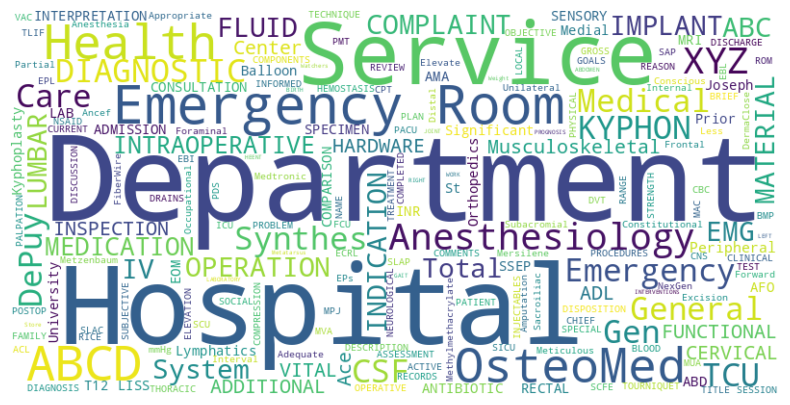

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the medication names into a single string
wordcloud_text = " ".join(C_medications)

# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Identified medicines:

1. **Medrol**: It is a brand name for methylprednisolone, a corticosteroid medication used to reduce inflammation and suppress the immune system. Often prescribed for allergies, asthma, and autoimmune disorders.

2. **Synthroid**: It is a brand name for levothyroxine, a medication used to treat hypothyroidism and manage goiter.

3. **Enoxaparin**: An anticoagulant (blood thinner) used to prevent blood clots, often post-surgery or in certain medical conditions.

4. **IBUPROFEN**: A nonsteroidal anti-inflammatory drug (NSAID) used to relieve pain, reduce inflammation, and lower fever.

5. **Lexapro**: It is a brand name for escitalopram, an antidepressant in the SSRI class.

6. **Lyrica**: It is a brand name for pregabalin, used to treat nerve pain from conditions like diabetes and shingles.

7. **OpSite**: OpSite is a brand of transparent adhesive film dressings used to protect wounds and surgical sites.

8. **Keflex**: It is a brand name for cephalexin, an antibiotic.

9. **Demerol**: It is a brand name for meperidine, an opioid pain medication.

10. **Combivent**: It is a combination inhaler containing ipratropium and albuterol, used for COPD and asthma.

12. **BCNU Procarbazine**: BCNU is a chemotherapy medication used for brain tumors. Procarbazine is another chemotherapy drug.

13. **Feosol**: It is a brand name for ferrous sulfate, a supplement for iron deficiency anemia.

14. **IV Antibiotics**: Antibiotics administered intravenously to treat severe bacterial infections.

15. **IODINE**: A chemical element essential for thyroid hormone synthesis and antiseptic use.

16. **DuraGen**: A brand of synthetic dural graft material used in neurosurgery.

17. **PENICILLIN**: An antibiotic used to treat bacterial infections.

18. **Zantac**: It is a brand name for ranitidine, used to reduce stomach acid production.

19. **Naprosyn**: It is a brand name for naproxen, an NSAID used for pain and inflammation.

20. **Digoxin**: It is a medication used to treat heart conditions.

21. **ECASA**: Likely refers to enteric-coated aspirin, used as a pain reliever and to prevent blood clot formation.

22. **MOBIC**: It is a brand name for meloxicam, an NSAID used for pain and inflammation.

23. **Fortaz**: It is a brand name for ceftazidime, an antibiotic.

24. **ESIs (epidural steroid injections)**: Medical procedures where steroids are injected into the epidural space of the spine to reduce inflammation and pain.

25. **Zoloft**: It is a brand name for sertraline, an antidepressant in the SSRI class.

26. **Darvocet**: It is a brand name for a combination medication containing propoxyphene and acetaminophen.

27. **Arixtra**: It is a brand name for fondaparinux, an anticoagulant.

28. **ReQuip**: It is a brand name for ropinirole, used to treat Parkinson's disease and restless legs syndrome.

29. **Epogen**: It is a brand name for epoetin alfa, used to treat anemia.

30. **NSAID**: Nonsteroidal anti-inflammatory drugs used to reduce pain, inflammation, and fever.

31. **Mitek**: A brand of medical devices used in orthopedic surgery for soft tissue repair.

32. **Levoxyl**: It is a brand name for levothyroxine, used to treat hypothyroidism.

33. **Klonopin**: It is a brand name for clonazepam, used to treat seizure disorders and anxiety.

34. **CEPHALOSPORIN**: A class of antibiotics similar to penicillin, used to treat bacterial infections.

35. **DOXYCYCLINE**: An antibiotic used to treat various bacterial infections.

36. **AMOXICILLIN**: An antibiotic used to treat bacterial infections.

37. **Prazosin**: It is an alpha-blocker medication used to treat high blood pressure and enlarged prostate symptoms.

38. **DePuy Trimline**: DePuy is a brand name for medical devices, Trimline could refer to a specific product.

39. **Metzenbaum**: Likely refers to Metzenbaum scissors used in various surgical procedures.

40. **Bacitracin**: An

 antibiotic ointment used to prevent and treat skin infections.

41. **IV Ancef**: Ancef (cefazolin) is an antibiotic used to prevent and treat bacterial infections.

42. **DePuy**: A brand name for medical devices.

43. **Mersilene**: A brand of surgical suture material.

44. **Celebrex**: It is a brand name for celecoxib, an NSAID.

45. **OxyContin**: It is a brand name for oxycodone, a powerful opioid pain medication.

46. **Duragesic (Fentanyl Transdermal)**: Duragesic is a brand name for fentanyl patches, delivering opioid pain relief through the skin.

47. **Ancef (Cefazolin)**: Antibiotic used to treat bacterial infections.
Belongs to the cephalosporin class.
Effective against various bacteria.

48. **Marcaine (Bupivacaine):** Local anesthetic for pain relief.
Used during surgeries and medical procedures.
Blocks nerve signals to provide numbness.

49. **Lidocaine:** Local anesthetic and antiarrhythmic.
Numbs areas for medical procedures.
Also treats abnormal heart rhythms.

50. **Vicodin (Hydrocodone with Acetaminophen):** Pain medication combining opioid (hydrocodone) and non-opioid (acetaminophen).
Used for moderate to moderately severe pain.
Opioid component can be habit-forming.



In [18]:
ortho_df.head()

,description,medical_specialty,transcription
2008,Youngswick osteotomy with internal screw fixa...,Orthopedic,"TITLE OF OPERATION: , Youngswick osteotomy int..."
2011,Austin & Youngswick bunionectomy with Biopro ...,Orthopedic,"PREOPERATIVE DIAGNOSES:,1. Hallux rigidus, lef..."
2012,Consultation for wrist pain.,Orthopedic,"CHIEF COMPLAINT:, Left wrist pain.,HISTORY OF ..."
2013,Excision of dorsal wrist ganglion. Made a tr...,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Wrist ganglion.,POST..."
2014,Unilateral transpedicular T11 vertebroplasty.,Orthopedic,"PREOPERATIVE DIAGNOSIS:, T11 compression fract..."


In [19]:
ortho_df.shape

(355, 3)

In [20]:
# Provided list of medications
list_of_medications = [
    'Medrol', 'Synthroid', 'Enoxaparin', 'IBUPROFEN', 'Lexapro', 'Lyrica',
    'OpSite', 'Keflex', 'Demerol', 'Combivent', 'BCNU Procarbazine', 'Feosol',
    'IV Antibiotics', 'IODINE', 'DuraGen', 'PENICILLIN', 'Zantac', 'Naprosyn',
    'Digoxin', 'ECASA', 'MOBIC', 'Fortaz', 'ESIs', 'Zoloft','Ancef', 'Marcaine','lidocaine',
    'Darvocet', 'Vicodin', 'antibiotics', 'Xeroform', 'Naprosyn',
    'Arixtra', 'ReQuip', 'Foraminal', 'Epogen', 'AcuFix', 'Kerrison', 'ORIF',
    'NSAID', 'Mitek', 'Levoxyl', 'Klonopin', 'CEPHALOSPORIN', 'DOXYCYCLINE',
    'AMOXICILLIN', 'Prazosin', 'DePuy Trimline', 'Metzenbaum', 'Bacitracin',
    'IV Ancef', 'DePuy', 'Mersilene', 'Celebrex', 'OxyContin', 'Duragesic', 'Fentanyl'
]

# Function to check if a medication from the list is present in the transcription
def find_medication(text):
    for medication in list_of_medications:
        if medication.lower() in text.lower():
            return medication
    return "Not listed"

# Add a new column "medications" to the DataFrame and fill it by checking each transcription
ortho_df['medications'] = ortho_df['transcription'].apply(find_medication)


<ipython-input-20-d4d79466aa21>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ortho_df['medications'] = ortho_df['transcription'].apply(find_medication)


In [21]:
# Display the updated DataFrame
ortho_df.head()

,description,medical_specialty,transcription,medications
2008,Youngswick osteotomy with internal screw fixa...,Orthopedic,"TITLE OF OPERATION: , Youngswick osteotomy int...",Ancef
2011,Austin & Youngswick bunionectomy with Biopro ...,Orthopedic,"PREOPERATIVE DIAGNOSES:,1. Hallux rigidus, lef...",Marcaine
2012,Consultation for wrist pain.,Orthopedic,"CHIEF COMPLAINT:, Left wrist pain.,HISTORY OF ...",Not listed
2013,Excision of dorsal wrist ganglion. Made a tr...,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Wrist ganglion.,POST...",Marcaine
2014,Unilateral transpedicular T11 vertebroplasty.,Orthopedic,"PREOPERATIVE DIAGNOSIS:, T11 compression fract...",Not listed


In [22]:
ortho_df['medications'].value_counts()

Not listed           127
Marcaine              46
ESIs                  38
Ancef                 21
antibiotics           18
Foraminal             12
lidocaine             11
Medrol                10
Kerrison               9
Keflex                 6
Naprosyn               5
IBUPROFEN              5
Lexapro                4
Synthroid              4
Bacitracin             4
Xeroform               4
IODINE                 4
Vicodin                3
IV Antibiotics         2
DePuy                  2
NSAID                  2
Celebrex               2
PENICILLIN             2
Lyrica                 1
ReQuip                 1
OpSite                 1
Mitek                  1
Demerol                1
Feosol                 1
Darvocet               1
DuraGen                1
ORIF                   1
BCNU Procarbazine      1
Digoxin                1
ECASA                  1
Combivent              1
AcuFix                 1
Name: medications, dtype: int64

## Extracting NER with spaCY

In [ ]:
!pip install -U spacy
!pip install scispacy

In [ ]:
# Install the en_core_sci_sm model from the specified URL
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

# Install the en_core_sci_md model from the specified URL
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_md-0.5.1.tar.gz

# Install the en_ner_bc5cdr_md model from the specified URL
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

In [ ]:
pip install render

In [31]:
# Import necessary libraries
import scispacy  # Library for scientific and biomedical text processing
import spacy  # Main spaCy library for natural language processing
# Core models for different text sizes
import en_core_sci_sm  # Core model for small-sized scientific text
import en_core_sci_md  # Core model for medium-sized scientific text

# Named Entity Recognition (NER) model for biomedical and chemical entity recognition
import en_ner_bc5cdr_md # Tools for extracting and displaying data
from spacy import displacy  # Tool for visualizing syntactic dependencies and named entities
import pandas as pd  # Library for data manipulation and analysis


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_md' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compat

In [36]:
text= ortho_df['transcription'][2008]
text

"TITLE OF OPERATION: , Youngswick osteotomy internal screw fixation first right metatarsophalangeal joint right foot.,PREOPERATIVE DIAGNOSIS: , Hallux limitus deformity right foot.,POSTOPERATIVE DIAGNOSIS: , Hallux limitus deformity right foot.,ANESTHESIA:, Monitored anesthesia care 15 mL 1:1 mixture 0.5% Marcaine 1% lidocaine plain.,ESTIMATED BLOOD LOSS:, Less 10 mL.,HEMOSTASIS:, Right ankle tourniquet set 250 mmHg 35 minutes.,MATERIALS USED: , 3-0 Vicryl, 4-0 Vicryl, two partially threaded cannulated screws 3.0 OsteoMed System internal fixation.,INJECTABLES: ,Ancef 1 g IV 30 minutes preoperatively.,DESCRIPTION OF THE PROCEDURE: , The patient brought operating room placed operating table supine position. After adequate sedation achieved anesthesia team, above-mentioned anesthetic mixture infiltrated directly patient's right foot anesthetize future surgical site. The right ankle covered cast padding 18-inch ankle tourniquet placed around right ankle set 250 mmHg. The right ankle tourni

In [33]:
# Load the small-sized scientific text model
nlp_sm = en_core_sci_sm.load()

# Process the text with the model
doc = nlp_sm(text)

# Display named entity extraction using displacy
displacy_image = displacy.render(doc, jupyter=True, style='ent')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


In [37]:
# Load the biomedical NER model
nlp_md = en_core_sci_md.load()

# Process the text using the loaded model
doc = nlp_md(text)

# Display the resulting named entity extraction using displacy
# This will render the entities in a visual format in Jupyter Notebook
displacy_image = displacy.render(doc, jupyter=True, style='ent')

# Extracting drug names

In [40]:
# Import the necessary libraries and modules
from spacy.matcher import Matcher
nlp_bc = en_ner_bc5cdr_md.load()

# Initialize the Matcher with the vocabulary of the NLP model
matcher = Matcher(nlp_bc.vocab)

# Define the pattern to match chemical entities
pattern = [{'ENT_TYPE': 'CHEMICAL'}, {'LIKE_NUM': True}, {'IS_ASCII': True}]
matcher.add("DRUG_DOSE", [pattern])

# List to store extracted chemical entities
chemical_entities = []

# Loop through each transcription in the DataFrame
for transcription in ortho_df['transcription']:
    doc = nlp_bc(transcription)  # Process the transcription using the NLP model
    matches = matcher(doc)  # Find matches using the Matcher

    # Extract matched spans and append to the list
    for match_id, start, end in matches:
        span = doc[start:end]  # The matched span
        chemical_entities.append(span.text)

# Display the list of extracted chemical entities
print(chemical_entities)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


['Marcaine 1%', 'lidocaine 1:', 'Xylocaine 0.5%', 'Keflex 500 mg', 'Soluspan 1.0 cc', 'morphine 1 mg', 'lidocaine 0.5%', 'ibuprofen 800 mg', 'Vicodin 500 mg', 'Marcaine 1%', 'Marcaine 1%', 'Lunesta 3 mg', 'Carisoprodol 350 mg', 'Lyrica 100 mg', 'Imuran 100mg', 'Prednisone 7.5mg', 'Aspirin 81mg', 'Trental 400mg', 'Norvasc 5mg', 'Hydralazine 50mg', 'Elavil 30mg', 'Vicodin 1-', 'bicarbonate 648mg', 'sodium 100mg', 'Kadian 30 mg', 'iron 240 mg', 'Paxil 20 mg', 'warfarin 1 mg', 'prednisone 1 tablet', 'desmopressin 1 tablet', 'Lortab 7.5 mg', 'lidocaine 1%', 'CPM 0 90', 'Vicodin 5/500 mg', 'Naprosyn 500 mg', 'Keflex 500 mg', 'FDP 25%', 'Lasix 80 mg', 'Lovenox 30 mg', 'Vicodin 5/500 mg', 'Zithromax one week', 'Marcaine 80 mg', 'amitriptyline 81 mg', 'RLE 3 3', 'K 15mg', 'Digoxin 0.25mg', 'Prazosin 2mg', 'Solu-Cortef 1000mg', 'Solu-Medrol 1g', 'Praziquantel 3.6g', 'Prednisone 60 mg', 'Prednisone 60mg', 'Zantac 50 IV', 'Propulsid 20mg', 'glucose 78,', 'Zoloft 50mg', 'Lithium 300mg', 'Creatinine

In [41]:
chemical_entities

['Marcaine 1%',
 'lidocaine 1:',
 'Xylocaine 0.5%',
 'Keflex 500 mg',
 'Soluspan 1.0 cc',
 'morphine 1 mg',
 'lidocaine 0.5%',
 'ibuprofen 800 mg',
 'Vicodin 500 mg',
 'Marcaine 1%',
 'Marcaine 1%',
 'Lunesta 3 mg',
 'Carisoprodol 350 mg',
 'Lyrica 100 mg',
 'Imuran 100mg',
 'Prednisone 7.5mg',
 'Aspirin 81mg',
 'Trental 400mg',
 'Norvasc 5mg',
 'Hydralazine 50mg',
 'Elavil 30mg',
 'Vicodin 1-',
 'bicarbonate 648mg',
 'sodium 100mg',
 'Kadian 30 mg',
 'iron 240 mg',
 'Paxil 20 mg',
 'warfarin 1 mg',
 'prednisone 1 tablet',
 'desmopressin 1 tablet',
 'Lortab 7.5 mg',
 'lidocaine 1%',
 'CPM 0 90',
 'Vicodin 5/500 mg',
 'Naprosyn 500 mg',
 'Keflex 500 mg',
 'FDP 25%',
 'Lasix 80 mg',
 'Lovenox 30 mg',
 'Vicodin 5/500 mg',
 'Zithromax one week',
 'Marcaine 80 mg',
 'amitriptyline 81 mg',
 'RLE 3 3',
 'K 15mg',
 'Digoxin 0.25mg',
 'Prazosin 2mg',
 'Solu-Cortef 1000mg',
 'Solu-Medrol 1g',
 'Praziquantel 3.6g',
 'Prednisone 60 mg',
 'Prednisone 60mg',
 'Zantac 50 IV',
 'Propulsid 20mg',
 'glu

We have successfully extracted medication information from the transcription data using a combination of approaches. The brute force approach, coupled with the power of the sci spaCy library, has enabled us to identify and collect valuable insights regarding medications mentioned in the medical transcriptions. This comprehensive extraction process lays the groundwork for more accurate data analysis and facilitates better healthcare decision-making.

**Conclusion:**


The project "Identifying and Extracting Medicines from Medical Transcriptions" serves a crucial purpose in the realm of healthcare by focusing on extraction of medicine names from medical transcriptions. Through the adept utilization of advanced Natural Language Processing (NLP) techniques and a structured methodology, this endeavor not only streamlines the analysis of medical data but also elevates the standard of medical documentation. The project's impact extends across diverse domains within healthcare, including research advancement, patient safety enhancement, and the critical analysis of potential drug interactions.

Notably, the medicine "Marcaine," an anesthetic of significance, emerged as the predominant medication in the analysis. This prominence was particularly observed within the specialty of orthopedics, closely followed by its application in epidural steroid injections. These insights shed light on the prevalence and significance of specific medications within specialized medical fields.

The approach employed in this project, combining tokenization, Named Entity Recognition (NER), and meticulous refinement, is poised to yield a comprehensive and dependable solution for effectively identifying and cataloging medicines within intricate medical texts. This solution helps the way medical information is processed, offering benefits that extend from accurate medical record-keeping to bolstering medical research and patient care quality.

## Thank you for reading till the end


## - Raviteja

https://www.linkedin.com/in/raviteja-padala/